<a href="https://colab.research.google.com/github/shilpapanniru/ShilpaReddyDS/blob/main/wallmartprojectbyshilpa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/Walmart DataSet.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.describe()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
df.isnull().sum().sum()

np.int64(0)

In [8]:
df.duplicated().sum()

np.int64(0)

In [10]:
# finding outliers using IQR
q1=df.quantile(0.25, numeric_only=True)
q3=df.quantile(0.75, numeric_only=True)
IQR=q3-q1
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR

In [13]:
print(lower_limit, upper_limit)

Store              -21.00000
Weekly_Sales   -746862.72750
Holiday_Flag         0.00000
Temperature          6.24000
Fuel_Price           1.73000
CPI                 10.22256
Unemployment         4.29450
dtype: float64 Store           6.700000e+01
Weekly_Sales    2.720371e+06
Holiday_Flag    0.000000e+00
Temperature     1.161600e+02
Fuel_Price      4.938000e+00
CPI             3.342557e+02
Unemployment    1.121850e+01
dtype: float64


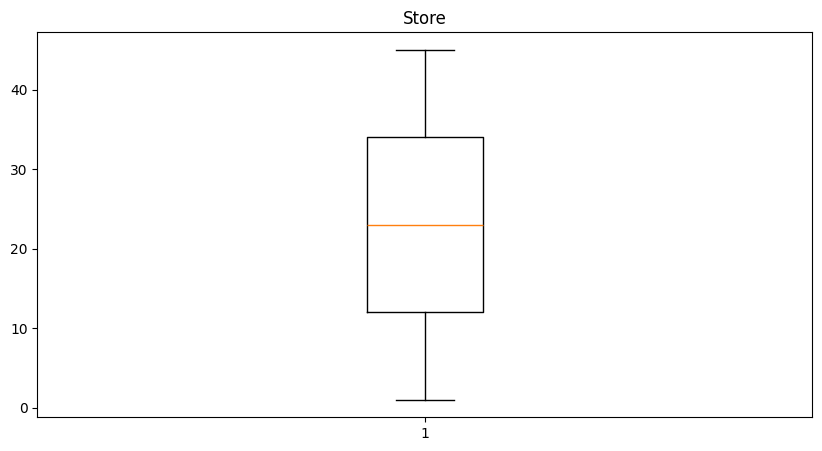

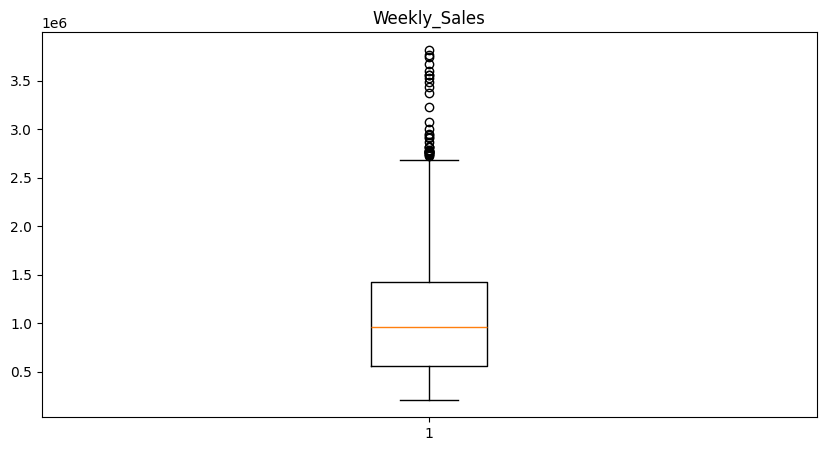

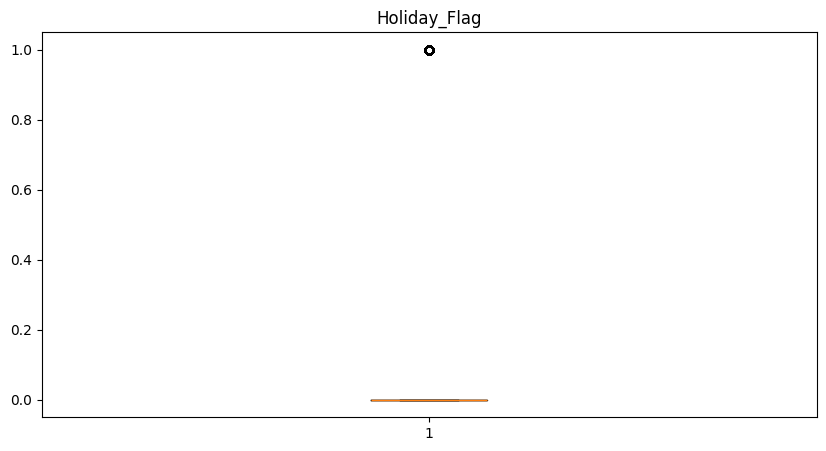

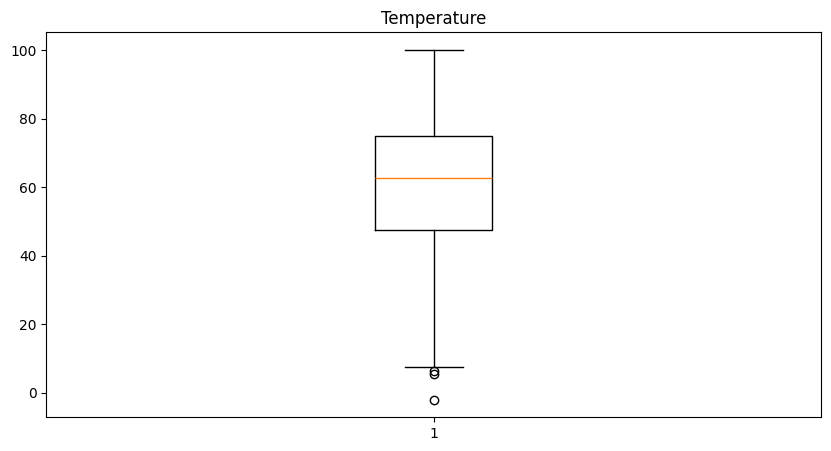

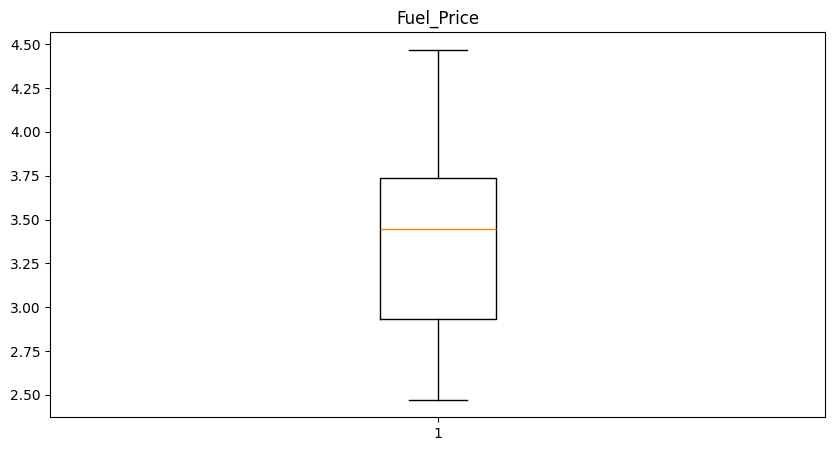

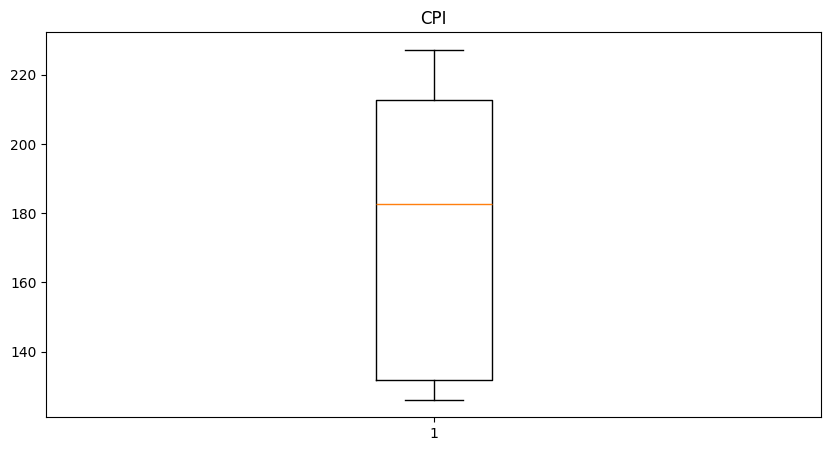

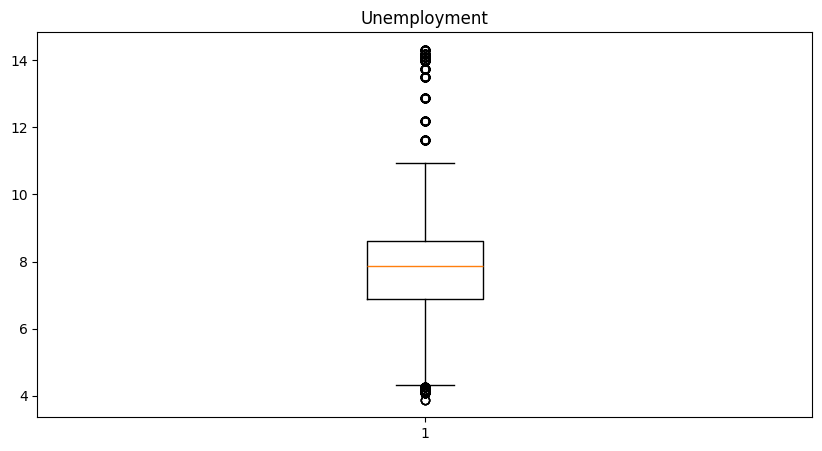

In [14]:
for i in df.columns:
  if df[i].dtypes!='object':
    plt.figure(figsize=(10,5))
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()


In [16]:
#list all columns those have outliers
outlier_columns=[]
for i in df.columns:
  if df[i].dtypes!='object':
    if df[i].min()<lower_limit[i] or df[i].max()>upper_limit[i]:
      outlier_columns.append(i)

In [17]:
outlier_columns

['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Unemployment']

In [18]:
# as this dataset is about wallmart store and the problem requirement is to forecast the sales for each store for next 12 weeks
#convert the date datatype object to index
if 'Date' in df.columns:
    df['Date']=pd.to_datetime(df['Date'], format='%d-%m-%Y')
    df.set_index('Date', inplace=True)
else:
    print("'Date' column already converted to index.")

'Date' column already converted to index.


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2 KB


In [20]:
#display the weekly sales of user entered store data
store_num=int(input('enter the store number: '))
weekly_sales=df[df['Store']==store_num]['Weekly_Sales']
weekly_sales

enter the store number: 1


,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
...,...
2012-09-28,1437059.26
2012-10-05,1670785.97
2012-10-12,1573072.81


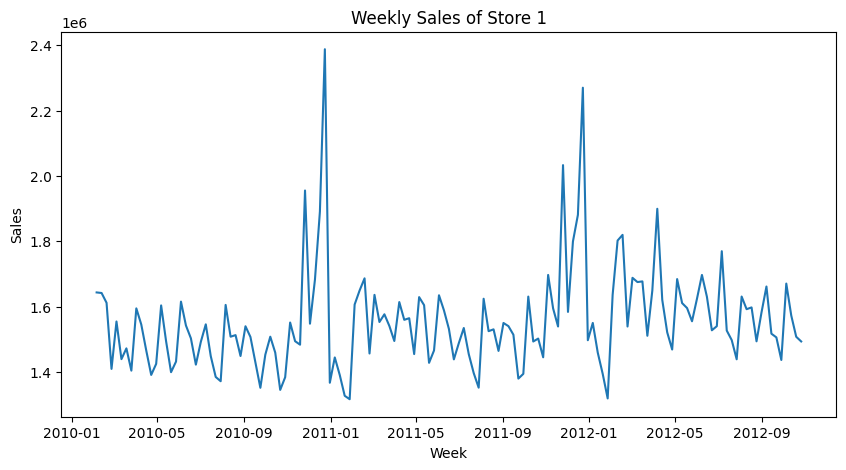

In [21]:
# plot the weekly sales of a perticular store
plt.figure(figsize=(10,5))
plt.plot(weekly_sales)
plt.title(f'Weekly Sales of Store {store_num}')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.show()


In [22]:
#If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?
unemployment_rate=df['Unemployment']
unemployment_rate



,Unemployment
Date,
2010-02-05,8.106
2010-02-12,8.106
2010-02-19,8.106
2010-02-26,8.106
2010-03-05,8.106
...,...
2012-09-28,8.684
2012-10-05,8.667
2012-10-12,8.667


In [23]:
# find the unemployment rate on weekly basis
weekly_unemployment=df.groupby('Store')['Unemployment'].mean()
weekly_unemployment

,Unemployment
Store,
1,7.610420
2,7.623846
3,7.176986
4,5.964692
5,6.295406
6,6.606902
7,8.585734
8,6.091846
9,6.099881


In [24]:
max_store=weekly_unemployment.idxmax()
max_store

np.int64(12)

In [ ]:
#Store 12 has highest unemployment rate, means store 12 ,28,38  are suffering for most of unemployement

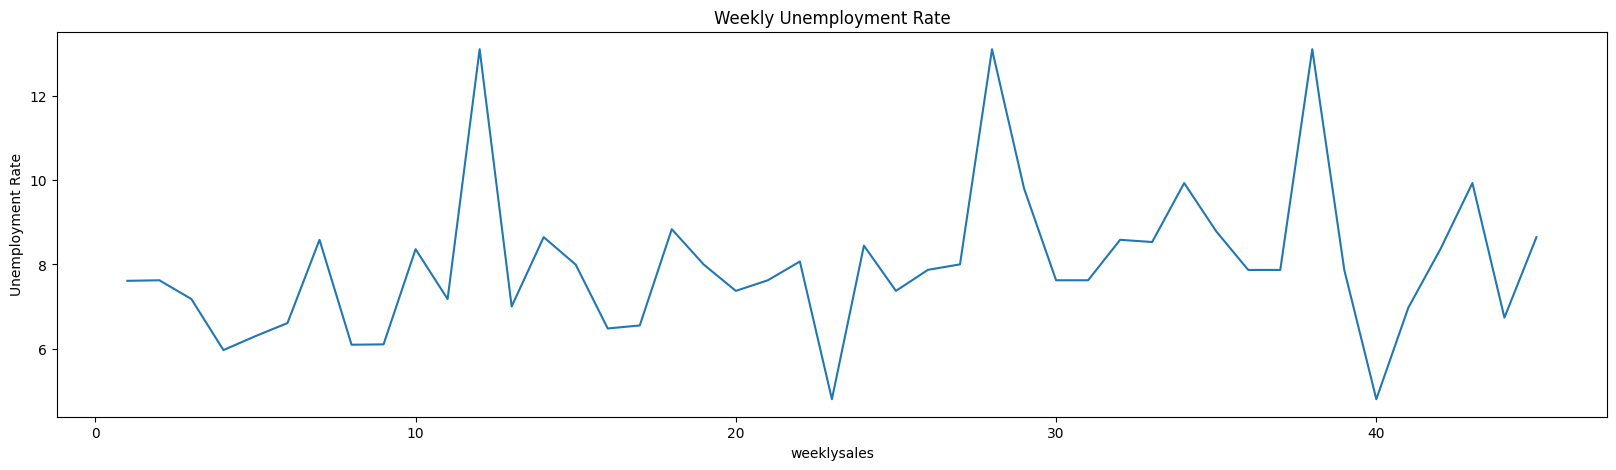

In [25]:
#visualize the effect unemployment on weekly sales
plt.figure(figsize=(20,5))
plt.plot(weekly_unemployment)
plt.title('Weekly Unemployment Rate')
plt.xlabel('weeklysales')
plt.ylabel('Unemployment Rate')
plt.show()

From this plot we understand that on which store have the highest impact of unemployment rate .

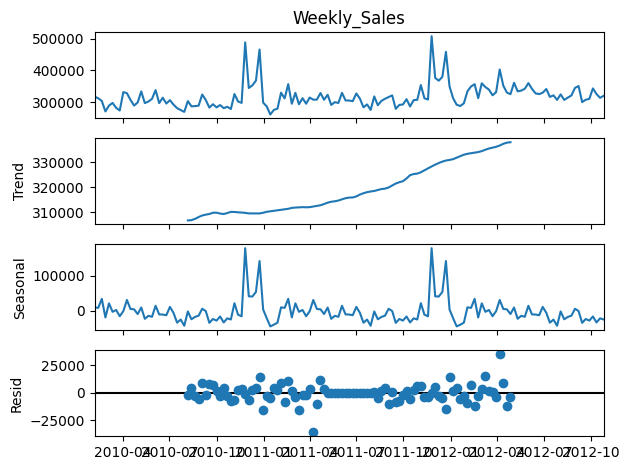

In [ ]:
#If the weekly sales show a seasonal trend, when and what could be the reason?
#the weekly sales have a seasonal trend, because of holiday there is more sales,  and every new year of january month also the sales are high.



#find seasonlity , trend, residual in the dataset
from statsmodels.tsa.seasonal import seasonal_decompose
# Ensure we use the correct weekly sales time series for the current store_num
store_weekly_sales = df[df['Store']==store_num]['Weekly_Sales']
decomposition=seasonal_decompose(store_weekly_sales, model='additive', period=52)


decomposition.plot()
plt.show()

In [30]:
# Does temperature affect the weekly sales in any manner? use groupby on temperature  of weekly sales
df_temperature=




,Temperature
Weekly_Sales,
209986.25,52.82
213538.32,71.34
215359.21,51.60
219804.85,52.91
220060.35,59.12
...,...
3595903.20,34.90
3676388.98,35.92
3749057.69,57.06


In [29]:
df['Temperature'].value_counts()

,count
Temperature,
50.43,11
67.87,10
76.03,9
76.67,9
70.28,9
...,...
33.18,1
30.26,1
31.91,1


In [31]:
df['Temperature'].min()

-2.06

In [32]:
df['Temperature'].max()

100.14

In [42]:
df['Temp_range'] = pd.cut(
    df['Temperature'],
    bins=[-5, 32, 50, 65, 80, 95, 105],
    labels=['Freezing', 'Cold', 'Cool', 'Warm', 'Hot', 'Extreme Heat']
)


In [43]:
df['Temp_range'].value_counts()

,count
Temp_range,
Warm,1876
Cool,1647
Cold,1340
Hot,1019
Freezing,515
Extreme Heat,38


In [44]:
temp_sales1=df.groupby('Temp_range')['Weekly_Sales'].mean()
temp_sales1

/tmp/ipython-input-1223376745.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_sales1=df.groupby('Temp_range')['Weekly_Sales'].mean()


,Weekly_Sales
Temp_range,
Freezing,1.050918e+06
Cold,1.113703e+06
Cool,1.043293e+06
Warm,1.060542e+06
Hot,9.573022e+05
Extreme Heat,5.332327e+05


In [38]:
df['Temp_Bin'] = pd.cut(df['Temperature'], bins=6)

In [39]:
temp_sales=df.groupby('Temp_Bin')['Weekly_Sales'].mean()
temp_sales

/tmp/ipython-input-1037738746.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_sales=df.groupby('Temp_Bin')['Weekly_Sales'].mean()


,Weekly_Sales
Temp_Bin,
"(-2.162, 14.973]",7.920840e+05
"(14.973, 32.007]",1.066928e+06
"(32.007, 49.04]",1.113824e+06
"(49.04, 66.073]",1.047355e+06
"(66.073, 83.107]",1.051584e+06
"(83.107, 100.14]",9.152190e+05


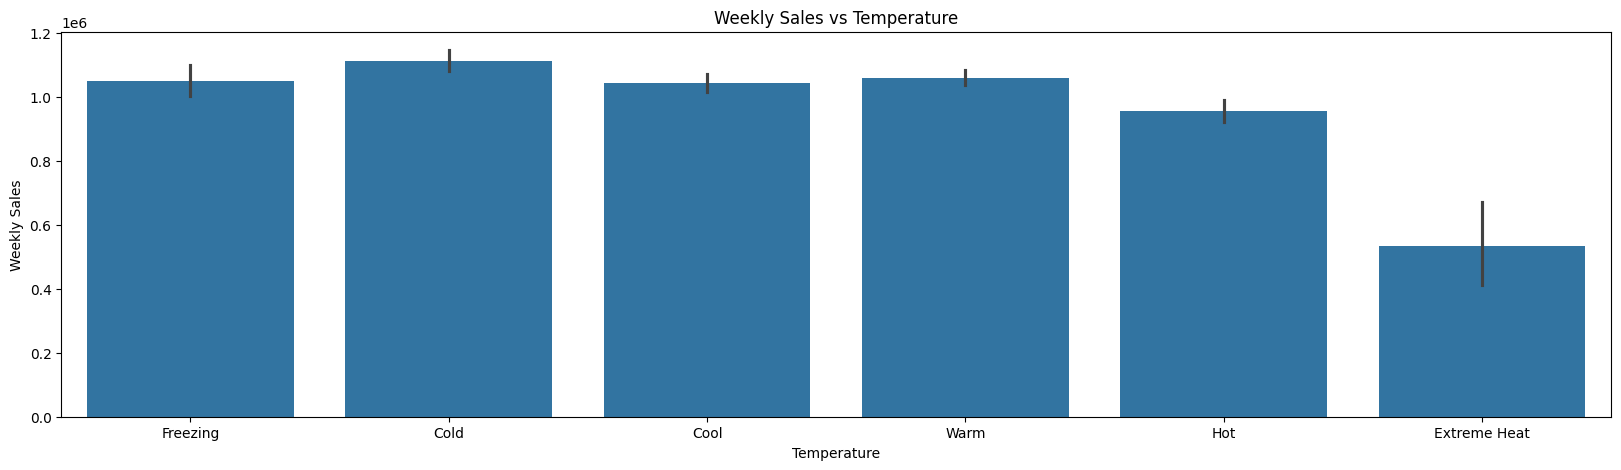

In [46]:
import matplotlib.pyplot as plt
#visualize the effect of temperaure on weekly sales
plt.figure(figsize=(20,5))
sns.barplot(x='Temp_range', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

Identified that temperature shows non-linear impact on sales due to strong interaction with seasonality and holiday effects.

In [49]:
#How is the Consumer Price index affecting the weekly sales of various stores?
cpi_corr = df['CPI'].corr(df['Weekly_Sales'])
print(cpi_corr)

-0.07263416204017632


negative result(-0.07263) indicates that , if CPI increase, then weekly sales are decreasing, due

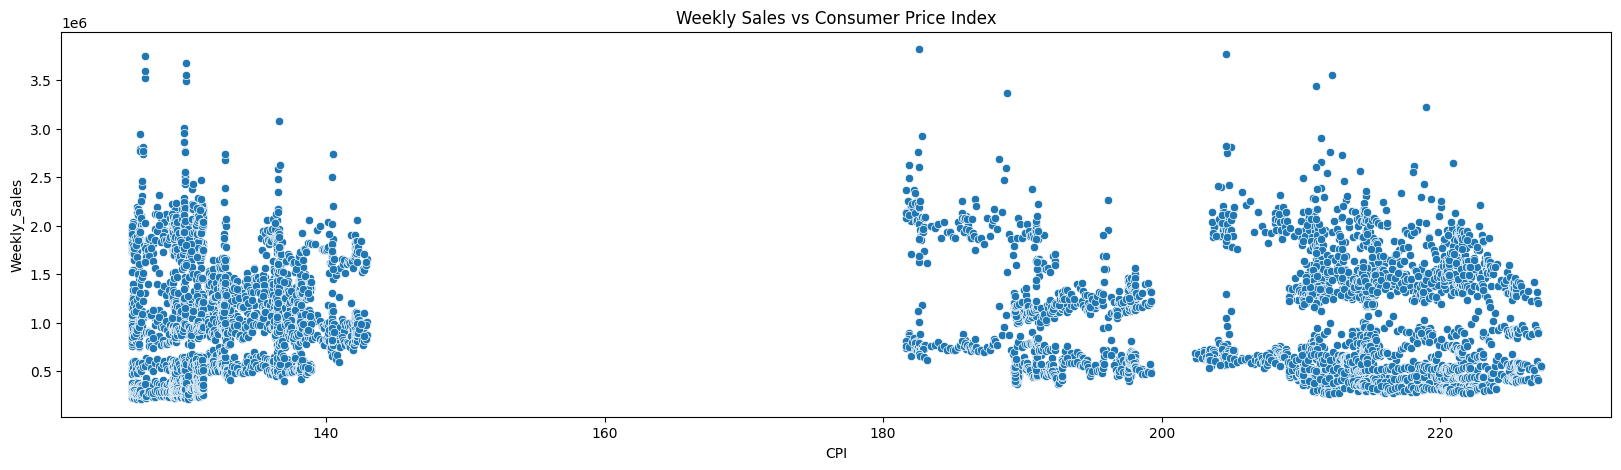

In [54]:
# weeklysales of various strores VS CPI
plt.figure(figsize=(20,5))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs Consumer Price Index')
plt.show()

CPI has a weak to moderate negative effect on weekly sales, with variations across stores, confirming that demand on essential goods have strong inflation over CPI

In [55]:
#Top performing stores according to the historical data.
top_performing_stores=df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
top_performing_stores

,Weekly_Sales
Store,
20,3.013978e+08
4,2.995440e+08
14,2.889999e+08
13,2.865177e+08
2,2.753824e+08
10,2.716177e+08
27,2.538559e+08
6,2.237561e+08
1,2.224028e+08


# store 20 is the top perfoming weekly sales.and worst performing store is 33

In [56]:
#the significant differance between highest performing store 20, lowest performing store 33
diff=top_performing_stores.iloc[0]-top_performing_stores.iloc[-1]
diff

np.float64(264237570.49999997)

In [57]:
3.013978e+08 -3.716022e+07

264237580.0

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Store         6435 non-null   int64   
 1   Weekly_Sales  6435 non-null   float64 
 2   Holiday_Flag  6435 non-null   int64   
 3   Temperature   6435 non-null   float64 
 4   Fuel_Price    6435 non-null   float64 
 5   CPI           6435 non-null   float64 
 6   Unemployment  6435 non-null   float64 
 7   Temp_Bin      6435 non-null   category
 8   Temp_range    6435 non-null   category
dtypes: category(2), float64(5), int64(2)
memory usage: 415.2 KB


In [59]:
df.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=6435, freq=None)

In [ ]:
#Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.


In [60]:
#place the two columns date , weeklysales
data1=df.reset_index()[['Date', 'Weekly_Sales']]
data1

,Date,Weekly_Sales
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68
...,...,...
6430,2012-09-28,713173.95
6431,2012-10-05,733455.07
6432,2012-10-12,734464.36
6433,2012-10-19,718125.53


In [61]:
# set the date column to index
data1.set_index('Date', inplace=True)
data1

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
...,...
2012-09-28,713173.95
2012-10-05,733455.07
2012-10-12,734464.36


In [67]:
store_weekly_sales_data = {}
for store_id in df['Store'].unique():
    store_data = df[df['Store'] == store_id]['Weekly_Sales']
    store_weekly_sales_data[store_id] = store_data
print("Extracted weekly sales for each store and stored them in 'store_weekly_sales_data' dictionary.")
# Display the first few entries for one store to confirm
if 1 in store_weekly_sales_data:
    print(f"\nSample data for Store 1:\n{store_weekly_sales_data[1].head()}")

Extracted weekly sales for each store and stored them in 'store_weekly_sales_data' dictionary.

Sample data for Store 1:
Date
2010-02-05    1643690.90
2010-02-12    1641957.44
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-03-05    1554806.68
Name: Weekly_Sales, dtype: float64


In [68]:
store_weekly_sales_data[1].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Series name: Weekly_Sales
Non-Null Count  Dtype  
--------------  -----  
143 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [69]:
from statsmodels.base.data import DataFrame
#convert this store_weekly_sales_data to DataFrame
store_weekly_sales_data=DataFrame(store_weekly_sales_data)

In [70]:
store_weekly_sales_data.isna().sum().sum()

np.int64(0)

In [71]:
store_weekly_sales_data.dropna(inplace=True)

In [72]:
store_weekly_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       143 non-null    float64
 1   2       143 non-null    float64
 2   3       143 non-null    float64
 3   4       143 non-null    float64
 4   5       143 non-null    float64
 5   6       143 non-null    float64
 6   7       143 non-null    float64
 7   8       143 non-null    float64
 8   9       143 non-null    float64
 9   10      143 non-null    float64
 10  11      143 non-null    float64
 11  12      143 non-null    float64
 12  13      143 non-null    float64
 13  14      143 non-null    float64
 14  15      143 non-null    float64
 15  16      143 non-null    float64
 16  17      143 non-null    float64
 17  18      143 non-null    float64
 18  19      143 non-null    float64
 19  20      143 non-null    float64
 20  21      143 non-null    float64
 21  22      143 non-null

In [73]:
#We can use Agumented Dickey-Fuller test to check for stationarity
from statsmodels.tsa.stattools import adfuller
staionary_storeids=[]
Nonstationary_storeids=[]
for store_id, sales_data in store_weekly_sales_data.items():
    result = adfuller(sales_data)
    print(f"Store {store_id}: p-value = {result[1]}")
    if result[1] <= 0.05:

        staionary_storeids.append(store_id)


    else:

        Nonstationary_storeids.append(store_id)


Store 1: p-value = 1.3877788330759434e-05
Store 2: p-value = 0.003990207089066268
Store 3: p-value = 0.03840926179831256
Store 4: p-value = 0.04779866223669836
Store 5: p-value = 0.00042517056141923293
Store 6: p-value = 2.1594858682169703e-06
Store 7: p-value = 0.0002170071890711771
Store 8: p-value = 1.0027464429004901e-06
Store 9: p-value = 2.1343093689388738e-05
Store 10: p-value = 8.763067535583776e-06
Store 11: p-value = 0.003316836737490261
Store 12: p-value = 1.0451838349619175e-06
Store 13: p-value = 2.05644619369346e-06
Store 14: p-value = 0.06786986708375098
Store 15: p-value = 1.5100158829353333e-06
Store 16: p-value = 0.00017660674414720552
Store 17: p-value = 5.679177242073009e-06
Store 18: p-value = 0.006006639324913575
Store 19: p-value = 1.1614730793254024e-06
Store 20: p-value = 3.4912952838128377e-06
Store 21: p-value = 2.159382229855235e-06
Store 22: p-value = 8.092841588352181e-08
Store 23: p-value = 1.7727358008327879e-07
Store 24: p-value = 8.281608598042004e-06


In [74]:
staionary_storeids

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 35,
 37,
 39,
 40,
 41,
 45]

In [75]:
Nonstationary_storeids

[14, 30, 36, 38, 42, 43, 44]

In [76]:
#Use predictive modeling techniques to forecast the sales for each store for the next 12weeks.

  #store id=10

In [77]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 16.6 MB/s eta 0:00:00


In [78]:
from pmdarima.arima import auto_arima

In [79]:
auto=auto_arima(store_weekly_sales_data[10])

In [80]:
auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1987.255
Date:                Tue, 30 Dec 2025   AIC                           3982.510
Time:                        15:40:48   BIC                           3994.361
Sample:                    02-05-2010   HQIC                          3987.326
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.683e+05    1.3e+05      6.693      0.000    6.14e+05    1.12e+06
ar.L1          0.4181      0.043      9.820      0.000       0.335       0.502
ar.L2          0.1251      0.069      1.821      0.069      -0.010       0.260
sigma2      6.912e+10      2.182   3.17e+10      0.000    6.91e+10    6.91e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1060.46
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                             2.18
Prob(H) (two-sided):                  0.11   Kurtosis:                        15.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.2e+36. Standard errors may be unstable.
"""

In [81]:
#according to auto arima, we build the SARIMAX(2,0,0)
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [82]:
store_weekly_sales_data[10]

,10
Date,
2010-02-05,2193048.75
2010-02-12,2176028.52
2010-02-19,2113432.58
2010-02-26,2006774.96
2010-03-05,1987090.09
...,...
2012-09-28,1694862.41
2012-10-05,1758971.38
2012-10-12,1713889.11


In [83]:
#split the data in to train and test
train_data=store_weekly_sales_data[10][:120]
test_data=store_weekly_sales_data[10][:23]

In [84]:
train_data

,10
Date,
2010-02-05,2193048.75
2010-02-12,2176028.52
2010-02-19,2113432.58
2010-02-26,2006774.96
2010-03-05,1987090.09
...,...
2012-04-20,1777166.53
2012-04-27,1712987.56
2012-05-04,1821364.42


In [85]:
#typecasting the column to numeric
train_data=pd.to_numeric(train_data, errors='coerce')

In [86]:
train_data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 120 entries, 2010-02-05 to 2012-05-18
Series name: 10
Non-Null Count  Dtype  
--------------  -----  
120 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


In [87]:
train_data.shape

(120,)

In [88]:
test_data=pd.to_numeric(test_data, errors='coerce')

In [89]:
test_data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 23 entries, 2010-02-05 to 2010-07-09
Series name: 10
Non-Null Count  Dtype  
--------------  -----  
23 non-null     float64
dtypes: float64(1)
memory usage: 368.0 bytes


In [90]:
test_data.shape

(23,)

In [91]:
#implemant sarimax model on train data
model=SARIMAX(train_data,order=(2,0,0),seasonal_order=(2,0,0,52))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [92]:
model_fit=model.fit()

In [93]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                 10   No. Observations:                  120
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 52)   Log Likelihood               -1669.380
Date:                            Tue, 30 Dec 2025   AIC                           3348.760
Time:                                    15:42:48   BIC                           3362.697
Sample:                                02-05-2010   HQIC                          3354.420
                                     - 05-18-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6511      0.090      7.264      0.000       0.475       0.827
ar.L2          0.3227      0.108      2.992      0.003       0.111       0.534
ar.S.L52       0.6198      0.809      0.767      0.443      -0.965       2.204
ar.S.L104      0.0191      1.247      0.015      0.988      -2.425       2.463
sigma2      9.841e+10    1.5e-11   6.57e+21      0.000    9.84e+10    9.84e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):              1400.18
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               3.17   Skew:                            -1.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.03e+38. Standard errors may be unstable.
"""

In [94]:
store_weekly_sales_data_predict=model_fit.predict(start=len(train_data),end=len(train_data)+len(test_data)-1)

In [95]:
test_data


,10
Date,
2010-02-05,2193048.75
2010-02-12,2176028.52
2010-02-19,2113432.58
2010-02-26,2006774.96
2010-03-05,1987090.09
2010-03-12,1941346.13
2010-03-19,1946875.06
2010-03-26,1893532.46
2010-04-02,2138651.97


In [96]:
store_weekly_sales_data_predict

,predicted_mean
2012-05-25,1.792732e+06
2012-06-01,1.811622e+06
2012-06-08,1.763872e+06
2012-06-15,1.799662e+06
2012-06-22,1.719977e+06
2012-06-29,1.733696e+06
2012-07-06,1.688164e+06
2012-07-13,1.724167e+06
2012-07-20,1.712200e+06
2012-07-27,1.683198e+06


/tmp/ipython-input-2657523491.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


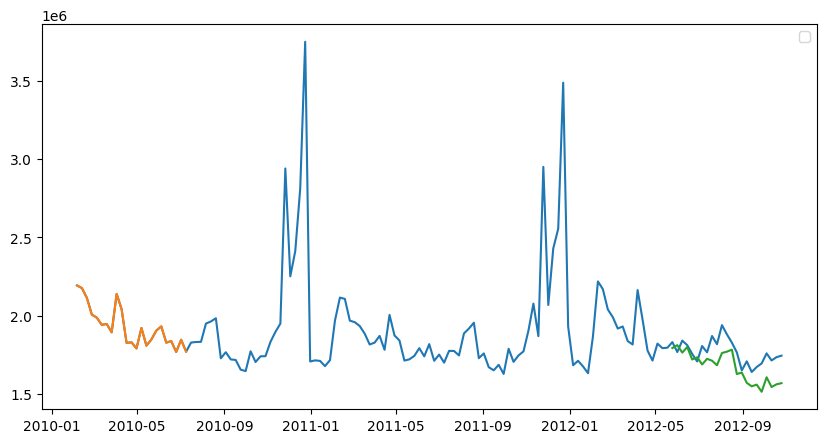

In [97]:
#plot the store_weekl_sales_data[5], weeklysalestest _data, store_weekly_sales_data_predict
plt.figure(figsize=(10,5))
plt.plot(store_weekly_sales_data[10])
plt.plot(test_data)
plt.plot(store_weekly_sales_data_predict)
plt.legend()
plt.show()

In [98]:
forecast_data=model_fit.forecast(steps=23+12)

In [ ]:
forecast_data

,predicted_mean
2012-05-25,1.792732e+06
2012-06-01,1.811622e+06
2012-06-08,1.763872e+06
2012-06-15,1.799662e+06
2012-06-22,1.719977e+06
2012-06-29,1.733696e+06
2012-07-06,1.688164e+06
2012-07-13,1.724167e+06
2012-07-20,1.712200e+06
2012-07-27,1.683198e+06


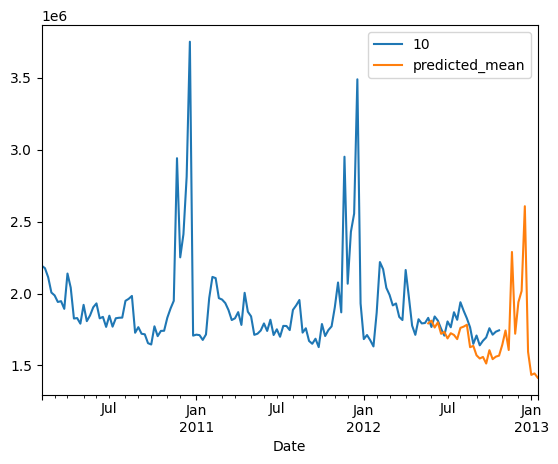

In [99]:
store_weekly_sales_data[10].plot()
forecast_data.plot()
plt.legend()
plt.show()

In [100]:
#evaluate the store_weekly_sales_data[10] using MAE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(test_data, store_weekly_sales_data_predict)
rmse=np.sqrt(mean_squared_error(test_data, store_weekly_sales_data_predict))


In [103]:
rmse


np.float64(277195.96382881823)

In [ ]:
#store_id=20

In [117]:
store_weekly_sales_data[20]

,20
Date,
2010-02-05,2401395.47
2010-02-12,2109107.90
2010-02-19,2161549.76
2010-02-26,1898193.95
2010-03-05,2119213.72
...,...
2012-09-28,2008350.58
2012-10-05,2246411.89
2012-10-12,2162951.36


In [104]:
#split the data in to train20, test20
train_data20=store_weekly_sales_data[20][:120]

In [105]:
train_data20.shape

(120,)

In [107]:
train_data20=pd.to_numeric(train_data20, errors='coerce')
train_data20.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 120 entries, 2010-02-05 to 2012-05-18
Series name: 20
Non-Null Count  Dtype  
--------------  -----  
120 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


In [108]:
test_data20=store_weekly_sales_data[20][:23]

In [109]:
test_data20=pd.to_numeric(test_data20, errors='coerce')
test_data20.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 23 entries, 2010-02-05 to 2010-07-09
Series name: 20
Non-Null Count  Dtype  
--------------  -----  
23 non-null     float64
dtypes: float64(1)
memory usage: 368.0 bytes


In [110]:
test_data20.shape

(23,)

In [111]:
!pip install prophet

In [ ]:
#implement this prophet for store id 20
auto1=auto_arima(store_weekly_sales_data[20])


In [115]:
from prophet import Prophet

In [118]:
model=Prophet()

In [121]:
#rename the columns to DS and y
# store_weekly_sales_data[20] is a pandas Series.
# The .rename() method for a Series does not accept the 'columns' keyword argument.
# To prepare data for Prophet, we need a DataFrame with 'ds' and 'y' columns.

# Convert the Series to a DataFrame and reset the index to make 'Date' a column
store20_for_prophet = store_weekly_sales_data[20].reset_index()

# Rename the columns: 'Date' to 'ds' and the sales column (which will be named '20' from the original Series name) to 'y'
store20_for_prophet.rename(columns={'Date': 'ds', 20: 'y'}, inplace=True)

# Display the prepared DataFrame
store20_for_prophet

,ds,y
0,2010-02-05,2401395.47
1,2010-02-12,2109107.90
2,2010-02-19,2161549.76
3,2010-02-26,1898193.95
4,2010-03-05,2119213.72
...,...,...
138,2012-09-28,2008350.58
139,2012-10-05,2246411.89
140,2012-10-12,2162951.36
141,2012-10-19,1999363.49


In [122]:
model.fit(store20_for_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [123]:
weekly_sales_forecast=model.make_future_dataframe(periods=23+12, freq='W')

In [124]:
weekly_sales_forecast

,ds
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05
...,...
173,2013-05-26
174,2013-06-02
175,2013-06-09
176,2013-06-16


In [126]:
forecasted_store20=model.predict(weekly_sales_forecast)
forecasted_store20

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,2.076758e+06,1.996671e+06,2.466719e+06,2.076758e+06,2.076758e+06,152034.188299,152034.188299,152034.188299,152034.188299,152034.188299,152034.188299,0.0,0.0,0.0,2.228792e+06
1,2010-02-12,2.077419e+06,2.025684e+06,2.464346e+06,2.077419e+06,2.077419e+06,161285.595871,161285.595871,161285.595871,161285.595871,161285.595871,161285.595871,0.0,0.0,0.0,2.238705e+06
2,2010-02-19,2.078080e+06,1.920068e+06,2.366264e+06,2.078080e+06,2.078080e+06,55788.243642,55788.243642,55788.243642,55788.243642,55788.243642,55788.243642,0.0,0.0,0.0,2.133869e+06
3,2010-02-26,2.078742e+06,1.799614e+06,2.260091e+06,2.078742e+06,2.078742e+06,-41961.695716,-41961.695716,-41961.695716,-41961.695716,-41961.695716,-41961.695716,0.0,0.0,0.0,2.036780e+06
4,2010-03-05,2.079403e+06,1.769509e+06,2.232080e+06,2.079403e+06,2.079403e+06,-85714.016056,-85714.016056,-85714.016056,-85714.016056,-85714.016056,-85714.016056,0.0,0.0,0.0,1.993689e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2013-05-26,2.205204e+06,1.956158e+06,2.424734e+06,2.204838e+06,2.205584e+06,-22311.015617,-22311.015617,-22311.015617,-22311.015617,-22311.015617,-22311.015617,0.0,0.0,0.0,2.182893e+06
174,2013-06-02,2.205997e+06,1.928965e+06,2.386729e+06,2.205611e+06,2.206396e+06,-36670.961967,-36670.961967,-36670.961967,-36670.961967,-36670.961967,-36670.961967,0.0,0.0,0.0,2.169326e+06
175,2013-06-09,2.206789e+06,1.939527e+06,2.393602e+06,2.206381e+06,2.207211e+06,-39175.554245,-39175.554245,-39175.554245,-39175.554245,-39175.554245,-39175.554245,0.0,0.0,0.0,2.167614e+06
176,2013-06-16,2.207582e+06,1.982698e+06,2.410479e+06,2.207147e+06,2.208020e+06,-17701.224312,-17701.224312,-17701.224312,-17701.224312,-17701.224312,-17701.224312,0.0,0.0,0.0,2.189881e+06


In [127]:
forecasted_store20[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
163,2013-03-17,2.088622e+06,1.870471e+06,2.316495e+06
164,2013-03-24,2.096552e+06,1.881875e+06,2.317095e+06
165,2013-03-31,2.137294e+06,1.909759e+06,2.366161e+06
166,2013-04-07,2.184539e+06,1.964727e+06,2.412972e+06
167,2013-04-14,2.186283e+06,1.958281e+06,2.421126e+06
168,2013-04-21,2.129814e+06,1.899207e+06,2.363496e+06
169,2013-04-28,2.066887e+06,1.834226e+06,2.283833e+06
170,2013-05-05,2.059521e+06,1.852304e+06,2.289636e+06
171,2013-05-12,2.111058e+06,1.889565e+06,2.338220e+06
172,2013-05-19,2.167236e+06,1.921662e+06,2.391722e+06


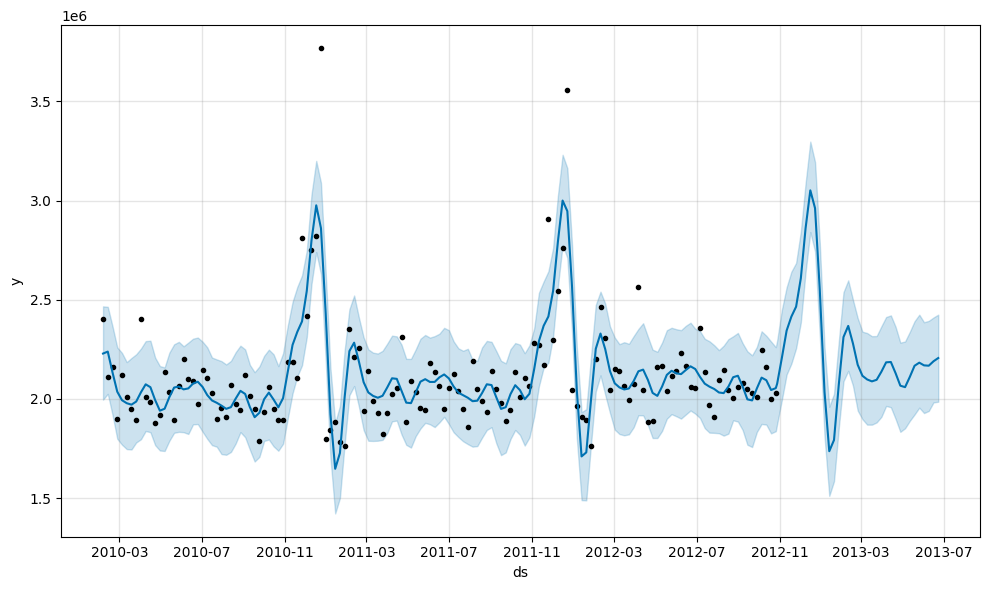

In [128]:
model.plot(forecasted_store20)
plt.show()

In [130]:
#evaluate this model
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(test_data20, store_weekly_sales_data_predict)
rmse=np.sqrt(mean_squared_error(test_data20, store_weekly_sales_data_predict))

In [131]:
mae

391913.26021227695

In [132]:
rmse

np.float64(428654.4281001029)

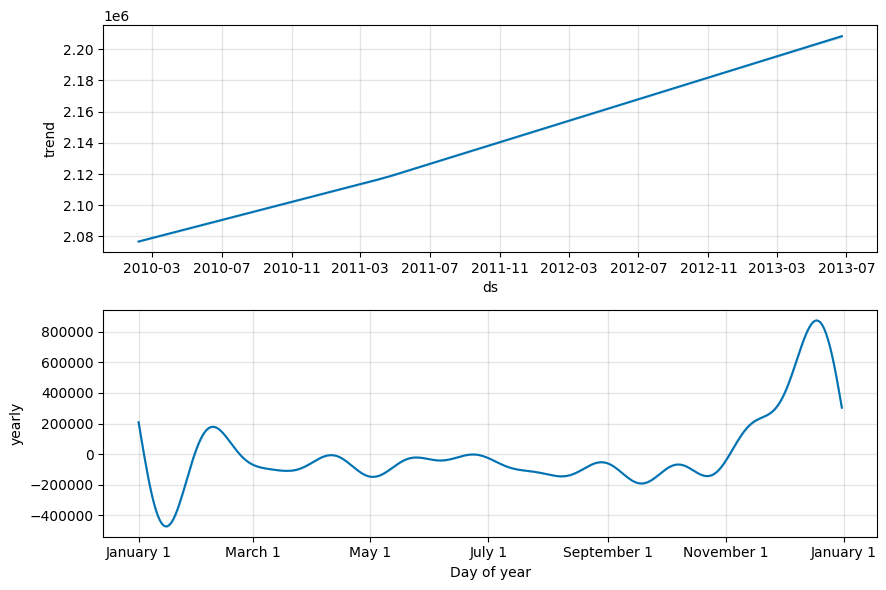

In [134]:
model.plot_components(forecasted_store20)

plt.show()

Model building for store id 5 using SARIMA


In [133]:
store_weekly_sales_data[5]

,5
Date,
2010-02-05,317173.10
2010-02-12,311825.70
2010-02-19,303447.57
2010-02-26,270281.63
2010-03-05,288855.71
...,...
2012-09-28,310141.68
2012-10-05,343048.29
2012-10-12,325345.41


In [136]:
auto1=auto_arima(store_weekly_sales_data[5])
auto1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1694.925
Date:                Tue, 30 Dec 2025   AIC                           3395.851
Time:                        17:06:45   BIC                           3404.718
Sample:                    02-05-2010   HQIC                          3399.454
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3757      0.072      5.195      0.000       0.234       0.518
ma.L1         -0.8889      0.039    -22.821      0.000      -0.965      -0.813
sigma2       1.24e+09   1.14e-11   1.08e+20      0.000    1.24e+09    1.24e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):               703.35
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                             2.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.58e+35. Standard errors may be unstable.
"""

In [137]:
#split the data into train and test
train_data5=store_weekly_sales_data[5][:120]
test_data5=store_weekly_sales_data[5][:23]

In [138]:
train_data5=pd.to_numeric(train_data5, errors='coerce')
train_data5.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 120 entries, 2010-02-05 to 2012-05-18
Series name: 5
Non-Null Count  Dtype  
--------------  -----  
120 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


In [139]:
test_data5=pd.to_numeric(test_data5, errors='coerce')
test_data5.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 23 entries, 2010-02-05 to 2010-07-09
Series name: 5
Non-Null Count  Dtype  
--------------  -----  
23 non-null     float64
dtypes: float64(1)
memory usage: 368.0 bytes


In [142]:
model5=SARIMAX(train_data5,order=(1,1,1),seasonal_order=(1,1,1,52))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [143]:
model5=model5.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [144]:
model5_predict=model5.predict(start=len(train_data5),end=len(train_data5)+len(test_data5)-1)

In [147]:
model5_predict

,predicted_mean
2012-05-25,335008.309821
2012-06-01,361616.605661
2012-06-08,340285.796144
2012-06-15,341246.594488
2012-06-22,338573.613385
2012-06-29,357989.202010
2012-07-06,344481.654770
2012-07-13,322451.832502
2012-07-20,329259.996767
2012-07-27,315429.717366


/tmp/ipython-input-4046848414.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


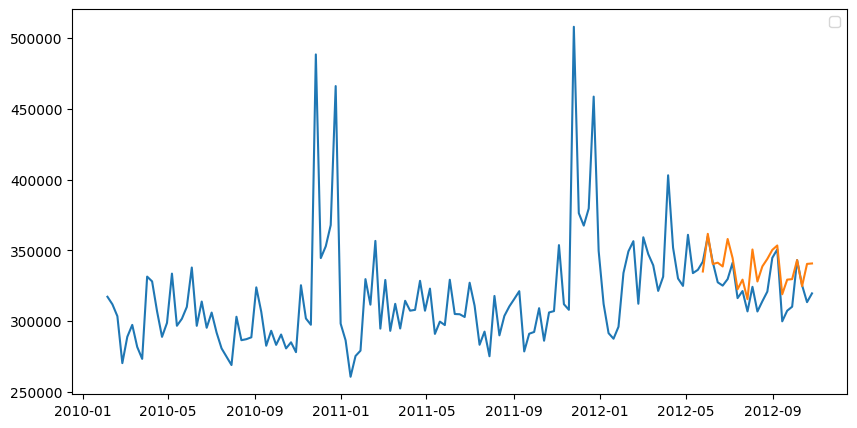

In [148]:
plt.figure(figsize=(10,5))
plt.plot(store_weekly_sales_data[5])
plt.plot(model5_predict)
plt.legend()
plt.show()

In [149]:
forecast_data5=model5.forecast(steps=23+12)

In [151]:
forecast_data5

,predicted_mean
2012-05-25,335008.309821
2012-06-01,361616.605661
2012-06-08,340285.796144
2012-06-15,341246.594488
2012-06-22,338573.613385
2012-06-29,357989.202010
2012-07-06,344481.654770
2012-07-13,322451.832502
2012-07-20,329259.996767
2012-07-27,315429.717366


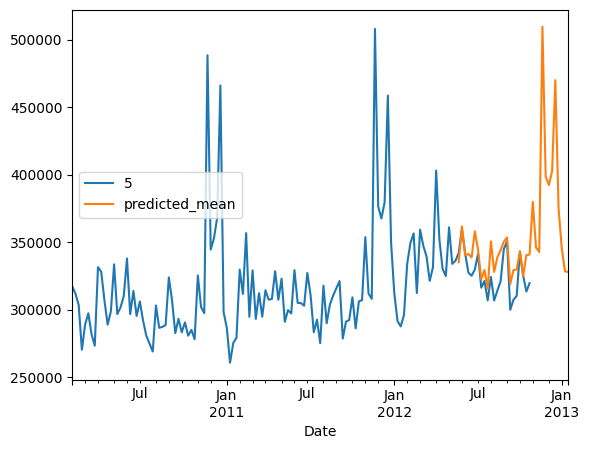

In [150]:
store_weekly_sales_data[5].plot()
forecast_data5.plot()
plt.legend()
plt.show()

Build the model

I build three models(SARIMAX,PROPHET , SARIMA)to forecast the sales for  store ids10, 20, 5 for the next 12 weeks.
